<a href="https://colab.research.google.com/github/khatriprajwol/Data-Visualization-/blob/main/Date.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Date cleaning

In [252]:
import numpy as np #a matrix like package for handling data
import pandas as pd #a R like package for handling data
from scipy import stats #a way to just get a piece of a large package
import matplotlib.pyplot as plt #a way to generate plots, histograms, bar charts, and other types of charts 
import seaborn as sns #it is based on matplotlib
import requests #HTTP library
import pandas as pd # used to manipulate data and analyze it
from bs4 import BeautifulSoup #Used for a web scraping purposes to pull the data out of HTML and XML files

In [253]:
import pandas as pa

df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Viz/main/IOT-temp.csv')

df.head(15)

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In
5,__export__.temp_log_196125_b0fa0b41,Room Admin,08-12-2018 09:29,31,In
6,__export__.temp_log_196121_01544d45,Room Admin,08-12-2018 09:28,29,In
7,__export__.temp_log_196122_f8b80a9f,Room Admin,08-12-2018 09:28,29,In
8,__export__.temp_log_196111_6b7a0848,Room Admin,08-12-2018 09:26,29,In
9,__export__.temp_log_196112_e134aebd,Room Admin,08-12-2018 09:26,29,In


Transpose is really a nice function. Compared to above table, this one is easy to read and understand data.

In [254]:
df.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
id,__export__.temp_log_196134_bd201015,__export__.temp_log_196131_7bca51bc,__export__.temp_log_196127_522915e3,__export__.temp_log_196128_be0919cf,__export__.temp_log_196126_d30b72fb,__export__.temp_log_196125_b0fa0b41,__export__.temp_log_196121_01544d45,__export__.temp_log_196122_f8b80a9f,__export__.temp_log_196111_6b7a0848,__export__.temp_log_196112_e134aebd,__export__.temp_log_196108_4a983c7e,__export__.temp_log_196108_4a983c7e,__export__.temp_log_196101_d5ec7633,__export__.temp_log_196099_3b8ef67b,__export__.temp_log_196095_788b2c27
room_id/id,Room Admin,Room Admin,Room Admin,Room Admin,Room Admin,Room Admin,Room Admin,Room Admin,Room Admin,Room Admin,Room Admin,Room Admin,Room Admin,Room Admin,Room Admin
noted_date,08-12-2018 09:30,08-12-2018 09:30,08-12-2018 09:29,08-12-2018 09:29,08-12-2018 09:29,08-12-2018 09:29,08-12-2018 09:28,08-12-2018 09:28,08-12-2018 09:26,08-12-2018 09:26,08-12-2018 09:25,08-12-2018 09:25,08-12-2018 09:24,08-12-2018 09:24,08-12-2018 09:22
temp,29,29,41,41,31,31,29,29,29,29,42,42,29,29,29
out/in,In,In,Out,Out,In,In,In,In,In,In,Out,Out,In,In,In


In [255]:
df.isnull()

,id,room_id/id,noted_date,temp,out/in
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
97601,False,False,False,False,False
97602,False,False,False,False,False
97603,False,False,False,False,False
97604,False,False,False,False,False


The function `isnull()` helps us find where in our dataset there are missing values. This is useful information as this is what we need to correct while data cleaning. As we can see in the table has a boolean data and all the value has `False`. If it has a value `True` then we will know that there is a missing value. Here, I do not see any `True` value in the table that means this table has a clean data to start with. 

I am trying to convert the noted_date into DateTime which is in day-month-Year Hour:Minute format.

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


Here `noted_date` is an object. 

In [257]:
df.noted_date = pa.to_datetime(df.noted_date)
df.noted_date

0       2018-08-12 09:30:00
1       2018-08-12 09:30:00
2       2018-08-12 09:29:00
3       2018-08-12 09:29:00
4       2018-08-12 09:29:00
                ...        
97601   2018-07-28 07:07:00
97602   2018-07-28 07:07:00
97603   2018-07-28 07:06:00
97604   2018-07-28 07:06:00
97605   2018-07-28 07:06:00
Name: noted_date, Length: 97606, dtype: datetime64[ns]

We know that in the above table, the `noted_date` is an object but after using to_datetime(), it got converted into a `datetime64` object as shown below. 

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          97606 non-null  object        
 1   room_id/id  97606 non-null  object        
 2   noted_date  97606 non-null  datetime64[ns]
 3   temp        97606 non-null  int64         
 4   out/in      97606 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 3.7+ MB


In [259]:
df.noted_date.agg(['min','max'])

min   2018-01-11 00:06:00
max   2018-12-10 23:55:00
Name: noted_date, dtype: datetime64[ns]

The minimum and maximum date and time are 2018-01-11 00:06:00 and 2018-12-10 23:55:00.

In [260]:
(df.noted_date.shift()-df.noted_date).max()

Timedelta('242 days 01:15:00')

The largest interval inbetween temperature check is 242 days 01:15:00. 

In [261]:
df.noted_date.mean()

Timestamp('2018-09-18 23:04:02.697989888')

 The average datetime is 2018-09-18 23:04:02.697989888.

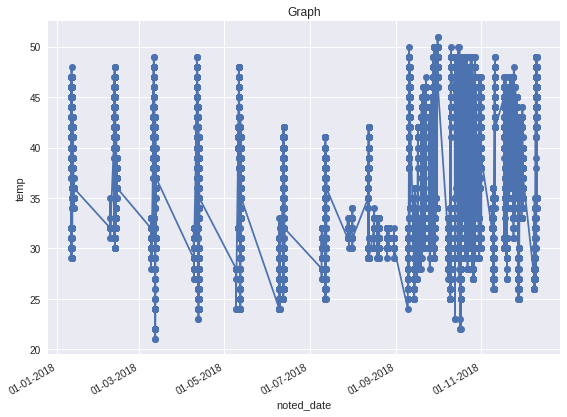

In [284]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates
import pandas as pd
plt.style.use('seaborn')

data = pd.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Viz/main/IOT-temp.csv')
data['noted_date'] = pd.to_datetime(data['noted_date'])
data.sort_values('noted_date', inplace=True)
start_date = data['noted_date']
close = data['temp']
plt.plot_date(start_date, close, linestyle='solid')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.title('Graph')
plt.xlabel('noted_date')
plt.ylabel('temp')
plt.show()

I though graphing it in a `time_series` would let me do the part 5 but it looks like I was wromg. i have also tried to use `loc` function but the problem is here the date format is different. It is harder than I have thought.

Code is taken from the link:`https://saralgyaan.com/posts/plot-time-series-in-python-matplotlib-tutorial-chapter-8/`